In [1]:
import sys
import numpy as np
from numpy import linalg as LA
from pyDOE import *
import george
from george.kernels import ExpSquaredKernel
import matplotlib.pyplot as plt

#Create design in area and depth
design = lhs(2, samples=25)
imag=[24.8,26.8]
area=[7500,20000]

design[:,0]=area[0]+(area[1]-area[0])*design[:,0]
design[:,1]=imag[0]+(imag[1]-imag[0])*design[:,1]
plt.scatter(design[:,0],design[:,1])
plt.title("Emulator Points")
plt.xlabel("Area in sqr deg")
plt.ylabel("i-band magnitude")
plt.show()

In [2]:
# Compute redshift distribution parameters based on fitting functions derived here 
# https://github.com/LSSTDESC/ObsStrat/tree/static/static

idepth=design[:,1]
idepth[0]=24
ilim=idepth-1
areavalues=design[:,0]
LSSneff=37.8*10**(0.359*(ilim - 25))
LSSz0 = 0.00627*(ilim-25)**2+0.0188*(ilim-25)+0.272
LSSalpha = 0.0125*(ilim-25)**2-0.025*(ilim-25)+0.909
WLneff = 4.33*(idepth-25)**2+7.03*(idepth-25)+10.49
WLz0 = -0.0125*(idepth-25)+0.193 
WLalpha = -0.069*(idepth-25)+0.876


In [3]:
# Tabulate design and derived parameters
from tabulate import tabulate
table=zip(areavalues,idepth,ilim,LSSneff,LSSz0,LSSalpha,WLneff,WLz0,WLalpha)
header=["area","idepth","ilim","LSSneff","LSSz0","LSSalpha","WLneff","WLz0","WLalpha"]
print tabulate(table, header)

    area    idepth     ilim    LSSneff     LSSz0    LSSalpha    WLneff      WLz0    WLalpha
--------  --------  -------  ---------  --------  ----------  --------  --------  ---------
16679.6    24       23         7.23589  0.25948     1.009      7.79     0.2055     0.945
19051      25.1584  24.1584   18.8519   0.260619    0.938894  11.7121   0.19102    0.865071
17427.2    25.6853  24.6853   29.141    0.266704    0.918106  17.3408   0.184434   0.828716
17714.8    26.0256  25.0256   38.6076   0.272485    0.908369  22.2541   0.18018    0.805235
10522.7    25.3126  24.3126   21.4149   0.26204     0.932091  13.1107   0.189092   0.85443
 9233.53   26.3062  25.3062   48.687    0.278344    0.902517  27.06     0.176673   0.785873
15341      26.7306  25.7306   69.1457   0.289081    0.897407  35.6236   0.171368   0.756591
12875.7    25.9863  24.9863   37.3737   0.271743    0.909345  21.6356   0.180671   0.807947
 9585.8    26.4072  25.4072   52.9255   0.280694    0.900893  28.9563   0.17541    0

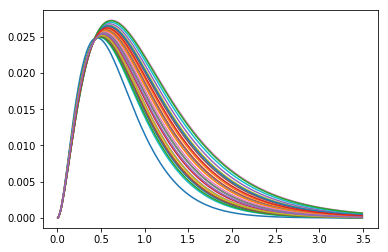

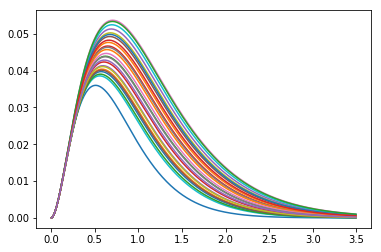

In [4]:
# Create redshift distribution files
zbin=300
zrange=[i for i in np.linspace(0.000001,3.5,zbin+1)]
zmin=zrange[0:300]
zmax=zrange[1:301]
zmid=[0.0]*zbin
for i in range(zbin): 
    zmid[i]=(zmin[i]+zmax[i])/2
nzWL=[0.0]*zbin
nzLSS=[0.0]*zbin

plt.figure(0)
plt.figure(1)
for i in range(len(design[:,1])):
    f = open('emu/wl_redshift_model%d_WLz0%e_WLalpha%e.txt'%(i,WLz0[i],WLalpha[i]),'w')
    g = open('emu/LSS_redshift_model%d_LSSz0%e_LSSalpha%e.txt'%(i,LSSz0[i],LSSalpha[i]),'w')
    for j in range(zbin):
        nzWL[j]=zmid[j]**2.0*np.exp(-((zmid[j]/WLz0[i])**WLalpha[i]))
        nzLSS[j]=zmid[j]**2.0*np.exp(-((zmid[j]/LSSz0[i])**LSSalpha[i]))
        f.write('%e %e %e %e\n'%(zmin[j],zmid[j],zmax[j],nzWL[j]))
        g.write('%e %e %e %e\n'%(zmin[j],zmid[j],zmax[j],nzLSS[j]))
    plt.figure(0)
    plt.plot(zmid,nzWL)
    plt.figure(1)
    plt.plot(zmid,nzLSS)
    f.close()
    g.close()
plt.show()


7.23588739658 0.25948
